**Standardization**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Creating DataFrame norm_df from CSV NormDF
df = pd.read_csv('OutlierFix1', index_col=0)

# Displaying first five results 
df.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid),C6'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.000000,2.117912,0.929419,1.510341,2.086360,1.0,1.508104,...,2.838849,3.957892,2.068186,2.143015,0,1,1,0.587076,9.0,1.306758
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.903090,2.154435,0.903090,1.391200,2.413300,0.0,-1.174460,...,3.049218,4.140818,2.383815,2.374748,1,0,0,1.080223,9.0,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,0.845098,2.410142,1.079181,1.373027,1.954243,1.0,-1.074337,...,2.511883,3.936497,1.518514,1.778151,1,0,0,0.527518,13.0,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.060698,2.519842,1.146128,1.521173,2.320146,1.0,-0.969052,...,2.706718,4.308869,1.770852,2.041393,1,1,0,0.518474,15.0,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.322219,2.758924,1.278754,1.959459,1.903090,1.0,0.412129,...,2.857332,4.061548,2.173186,2.222716,0,1,1,0.571274,20.0,1.195813


In [3]:
# checking for null values 
print(df.isnull().sum(axis=0).tolist())
# T5 has NULL value, fixing NULL 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
df['T5'].fillna(df['T5'].median(), inplace=True)

In [5]:
# checking for null values 
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
# Taking catagorical variables and putting them in df_I
# This way, they do not interfere with Standardization
df_I = df.iloc[:,:3]

# Checking df_I 
df_I.head()

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [8]:
# Taking target variables and putting them in df_T
# This way, they do not interfere with Normalization
df_T = df.iloc[:,22:24]
df_T.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


In [9]:
# Temporarily dropping catagorical variables from 
# norm_df DataFrame 
df=df.drop(['I1', 'I2', 'I3'], axis=1)
df.head()

,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,C4,C5,C6,...,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid),C6'
0,1.000000,2.117912,0.929419,1.510341,2.086360,1.0,1.508104,0.029074,1.967162,1.915234,...,2.838849,3.957892,2.068186,2.143015,0,1,1,0.587076,9.0,1.306758
1,0.903090,2.154435,0.903090,1.391200,2.413300,0.0,-1.174460,-0.013352,1.953986,1.854720,...,3.049218,4.140818,2.383815,2.374748,1,0,0,1.080223,9.0,0.000000
2,0.845098,2.410142,1.079181,1.373027,1.954243,1.0,-1.074337,0.020715,1.933344,1.885107,...,2.511883,3.936497,1.518514,1.778151,1,0,0,0.527518,13.0,0.000000
3,1.060698,2.519842,1.146128,1.521173,2.320146,1.0,-0.969052,0.020023,1.928444,1.880805,...,2.706718,4.308869,1.770852,2.041393,1,1,0,0.518474,15.0,0.000000
4,1.322219,2.758924,1.278754,1.959459,1.903090,1.0,0.412129,-0.034895,1.956366,1.905290,...,2.857332,4.061548,2.173186,2.222716,0,1,1,0.571274,20.0,1.195813


In [11]:
drop_df = pd.concat([df_I, df_T], axis=1, join_axes=[df.index])
drop_df.head()

,I1,I2,I3,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,0,1


In [13]:
# Column Names 
norm_names = df.columns

# Scaler function from Preprocessing 
scaler = preprocessing.StandardScaler()

# Transforming norm_df
stand_df = scaler.fit_transform(df)

# Making DataFrame from Standardized data 
# Using column names defined earlier 
stand_df = pd.DataFrame(stand_df, columns=norm_names)

In [14]:
# Printing new DataFrame to check the outcome 
print(stand_df)

        P_IPO       P_H       P_L    P_1DAY        C1        C2        C3  \
0   -0.657417 -1.536646 -1.353286 -0.448017  0.061864  0.397360  1.341329   
1   -1.248445 -1.369829 -1.557354 -1.192796  1.363203 -2.516611 -0.868273   
2   -1.602123 -0.201891 -0.192519 -1.306401 -0.464011  0.397360 -0.785803   
3   -0.287236  0.299161  0.326368 -0.380307  0.992418  0.397360 -0.699081   
4    1.307714  1.391162  1.354312  2.359522 -0.667616  0.397360  0.438584   
5    0.137455 -0.072370 -0.055108 -0.161732 -0.388840  0.397360  0.421582   
6   -2.010414 -0.470493 -0.485407 -1.302136  0.144855  0.397360 -0.915676   
7   -2.493319 -0.201891 -0.192519 -1.842509 -0.444910 -2.516611 -0.645913   
8    0.416518  0.760016  0.775848  0.023338 -0.281880  0.397360 -0.558975   
9   -0.936479  0.977703  0.979916 -0.089445 -0.181153  0.397360  1.039908   
10   0.137455  0.054207  0.076913 -0.089445 -0.164921  0.397360  0.276577   
11  -2.493319 -1.709425 -1.557354 -1.462813 -0.299253  0.397360  0.276577   

In [15]:
# Adding the three catagorical values back into the DataFrame 
stand_df = pd.concat([drop_df, stand_df], axis=1, join_axes=[stand_df.index])
print(stand_df)

       I1                                     I2    I3  Y1  Y2     P_IPO  \
0    AATI     ADVANCED ANALOGIC TECHNOLOGIES INC  3674   0   1 -0.657417   
1    ABPI        ACCENTIA BIOPHARMACEUTICALS INC  2834   1   0 -1.248445   
2    ACAD             ACADIA PHARMACEUTICALS INC  2834   1   0 -1.602123   
3    ACHN          ACHILLION PHARMACEUTICALS INC  2834   1   1 -0.287236   
4    ACLI        AMERICAN COMMERCIAL LINES INC.   4492   0   1  1.307714   
5    ACOM                     Ancestry.com Inc.   7379   0   1  0.137455   
6    ACOR                ACORDA THERAPEUTICS INC  2836   1   1 -2.010414   
7    ACRX             ACELRX PHARMACEUTICALS INC  2834   1   0 -2.493319   
8    ACTV                     ACTIVE NETWORK INC  7372   1   1  0.416518   
9     ACW                          ACCURIDE CORP  3714   1   0 -0.936479   
10   ADKU             ADCARE HEALTH SYSTEMS, INC  8748   1   1  0.137455   
11   ADLS  Advanced Life Sciences Holdings, Inc.  2854   1   1 -2.493319   
12   ADZA   

In [16]:
# Checking mean for standardized 
# Want to see mean very close to 0 
stand_df.mean()

I3        4.871669e+03
Y1        5.131965e-01
Y2        7.038123e-01
P_IPO     2.083703e-16
P_H      -6.370759e-16
P_L      -2.654280e-16
P_1DAY   -1.991564e-15
C1       -1.513940e-16
C2       -6.788314e-17
C3       -7.406913e-17
C4        7.162729e-18
C5        4.602054e-15
C6        8.944946e-15
C7       -6.511572e-18
T1        2.772709e-16
T2        7.510081e-16
T3       -2.334195e-16
T4       -7.927330e-16
T5       -8.404812e-16
S1        7.180636e-16
S2       -4.147973e-16
S3       -1.397546e-16
Y1       -3.841827e-17
Y2       -5.144142e-17
C3'       2.086959e-16
C5'       6.356922e-17
P(mid)   -1.997628e-16
C6'      -4.232522e-18
dtype: float64

In [17]:
# Checking standard deviation of standardized data
# Want std dev of each column close to 1 
stand_df.std()

I3        2072.423003
Y1           0.500193
Y2           0.456910
P_IPO        1.000734
P_H          1.000734
P_L          1.000734
P_1DAY       1.000734
C1           1.000734
C2           1.000734
C3           1.000734
C4           1.000734
C5           1.000734
C6           1.000734
C7           1.000734
T1           1.000734
T2           1.000734
T3           1.000734
T4           1.000734
T5           1.000734
S1           1.000734
S2           1.000734
S3           1.000734
Y1           1.000734
Y2           1.000734
C3'          1.000734
C5'          1.000734
P(mid)       1.000734
C6'          1.000734
dtype: float64

In [18]:
# Exporting DataFrame as CSV named StandDF
stand_df.to_csv('StandDF', ',')

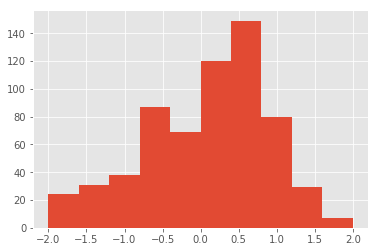

In [19]:
# Looking at Central Tendancy 
stand_df['P_IPO'].hist(range=(-2,2))
# Central Tendancy of Data is Normal
# if the range is [-2,2] and does not take into accounts 
# outliers. 

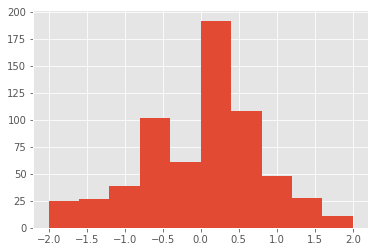

In [20]:
stand_df['P_H'].hist(range=(-2,2))
# Central Tendancy of Data is Normal 

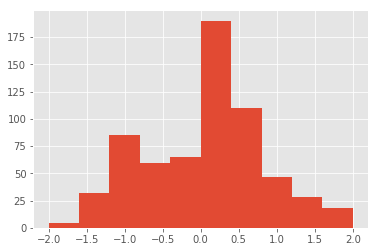

In [21]:
stand_df['P_L'].hist(range=(-2,2))

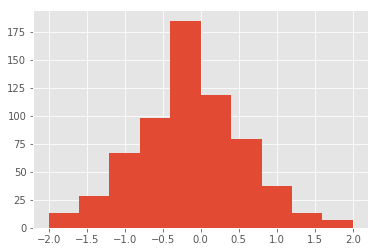

In [22]:
stand_df['P_1DAY'].hist(range=(-2,2))

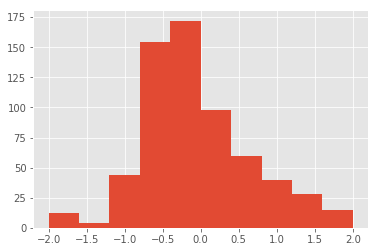

In [23]:
stand_df['C1'].hist(range=(-2,2))

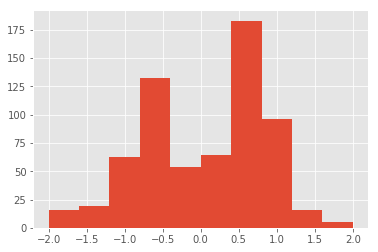

In [24]:
stand_df['C3'].hist(range=(-2,2))

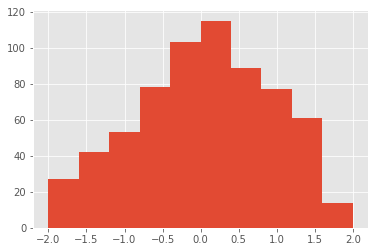

In [25]:
stand_df['C4'].hist(range=(-2,2))

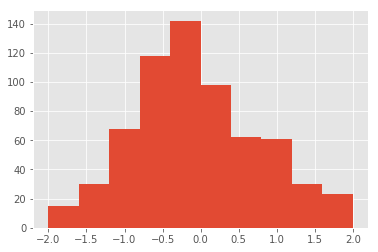

In [26]:
stand_df['C5'].hist(range=(-2,2))

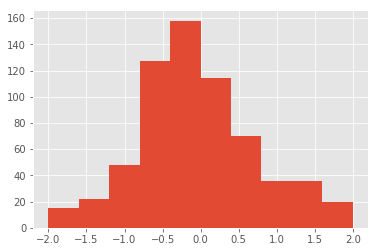

In [27]:
stand_df['C6'].hist(range=(-2,2))

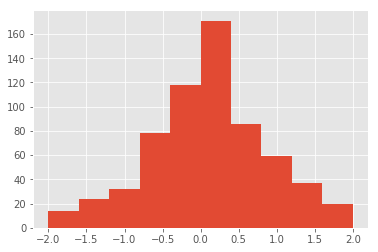

In [28]:
stand_df['C7'].hist(range=(-2,2))

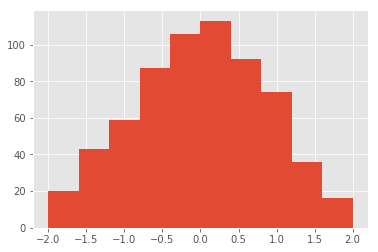

In [29]:
stand_df['T1'].hist(range=(-2,2))

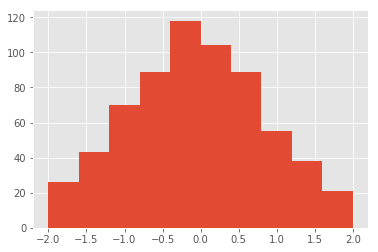

In [30]:
stand_df['T2'].hist(range=(-2,2))

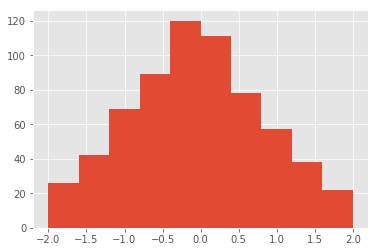

In [31]:
stand_df['T3'].hist(range=(-2,2))

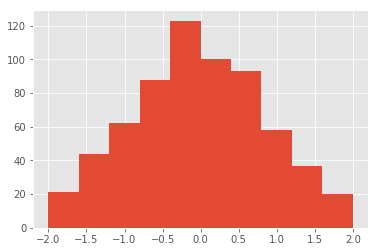

In [32]:
stand_df['T4'].hist(range=(-2,2))

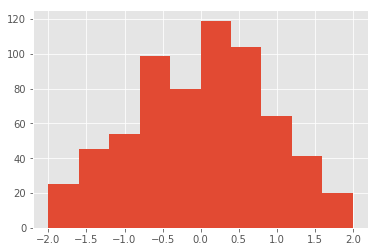

In [33]:
stand_df['T5'].hist(range=(-2,2))

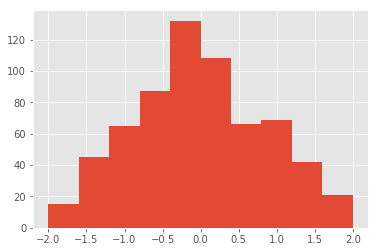

In [34]:
stand_df['S1'].hist(range=(-2,2))

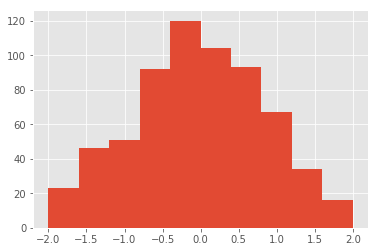

In [35]:
stand_df['S2'].hist(range=(-2,2))

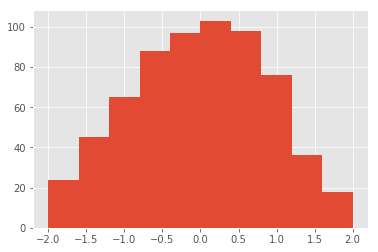

In [36]:
stand_df['S3'].hist(range=(-2,2))

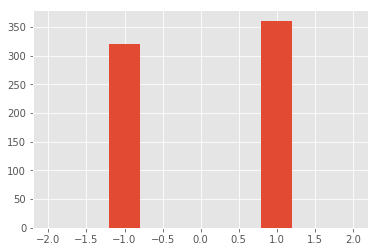

In [37]:
stand_df["C3'"].hist(range=(-2,2))

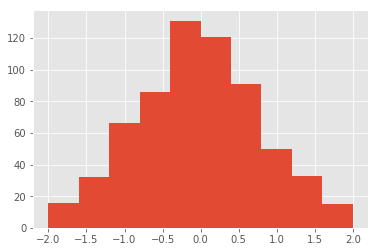

In [38]:
stand_df["C5'"].hist(range=(-2,2))